# HW08

## Pre-Lecture HW

### Question 1
(a) Classification decision trees are used to address problems that would arrive at a categorical solution. Classification decision trees are also fairly interpretable while being able to capture complex non-linear relationships. Examples of problems classification decision trees would be predicting loan default, fradulent emails, and product recommendations. 
(b) The difference between classification decision trees and multiple linear regression is for classification trees, the final output is a piece of categorical data, while for multiple linear regression the output would be a continuous numerical variable. Classification trees begin from the base node and split the data to maximize separation. Unlike a multiple linear regression model which models the variables as a linear relationship and attempts to make predictions then. And categorical variables of a multiple linear regression model needs to be encoded. 

##### Chat Summary 
A classification decision tree is a supervised learning model used to predict categorical outcomes. It works by recursively splitting data into subsets based on feature values, forming a tree-like structure of decision rules. Key elements include root nodes (starting point), internal nodes (decision points), branches (outcomes), and leaf nodes (final predictions).
Real-world applications of classification trees include:
Predicting customer churn, disease diagnosis, fraud detection, and spam email classification.
Multiclass problems like categorizing land use or predicting product categories.
Comparison with Multiple Linear Regression:
Classification trees handle categorical outcomes and automatically capture interactions between features through sequential, hierarchical splits.
In contrast, multiple linear regression predicts continuous outcomes and requires manual feature interaction modeling.
Key Strengths of Classification Trees:
They capture nonlinear relationships and feature interactions without explicit specification.
They offer high interpretability through localized decision rules, making them useful for decision-making tasks like loan approval or risk assessment.
We also explored the perceived conflict between interpretability and modeling complex relationships. Classification trees balance these by breaking down complex relationships into simple, stepwise rules. However, excessive tree depth can reduce interpretability, which can be addressed with pruning or ensemble methods.
Overall, classification trees are powerful, interpretable tools for solving diverse categorical prediction problems.


### Question 2
1. Accuarcy refers to the percent of correct predictions for all classes. So it includes both true positive and true negatives. Accuracy is the most useful when the cost (the consequences) of false positive and false negatives are equal or close to equal, and when the classes in the dataset are balanced (the occurances of positives and negatives are equal). A real-world example of accuracy being a useful metric is identifying handwritten numbers. In this case, misidentifying a number does not really matter. And all numbers are used to an approximately equal amount. 
2. Sensitivity also known as recall, measures the models ability to predict all true positives. It matters in cases where a false negative would be extremely costly. For example a false negative on a cancer patient can be costly, since it may make doctors miss an important period in which the patient has a greater chance of survival. 
3. Specificity measures the models ability to predict all true negatives. This means that out of all the negative instances, how many of the true negatives did the model actually predict correctly. Specificity matters when the cost of a false positive is detrimental. Similar to sentitivity when a cancer patient is false positively diagnosed, it may cause them unneeded stress and depression. 

    2 % 3. Specificity and sensitivity go hand in hand. If the model has high sensitivity but along the way of identifying true positives, it may incorrectly predict many false positives. Therefore it's specificity would be worse. The goal of models is to find a balance between specificity and sensitivity. 

4. Precision answers the question of out of all the positive instances which the models predicts how many of them are actually a true positive. Precision is useful when the impact of false positive is consequential. For example in a fraud email detector one would want fraudulent emails to be filtered out. And when it does not it causes inconvience and even more potential harm. 

##### Chat Summary
Here’s a summary of our exchange regarding accuracy, sensitivity, precision, and specificity without the formulas:
Accuracy:
Accuracy measures the overall correctness of the model, indicating the proportion of correct predictions (both positive and negative) out of all predictions. It's useful when the classes in the dataset are balanced, but it can be misleading if the dataset is imbalanced (e.g., when one class is much more frequent than the other).
Sensitivity (Recall):
Sensitivity, or recall, measures how well the model identifies actual positive instances. It’s particularly important when the cost of missing a positive instance is high, such as in medical diagnoses where failing to identify a disease could be dangerous.
Precision:
Precision measures how many of the predicted positive instances are actually correct. It's useful when false positives are costly or undesirable, such as in spam detection, where you don’t want legitimate emails to be misclassified as spam.
Specificity:
Specificity measures how well the model identifies actual negative instances. It’s crucial when minimizing false positives is important, such as in fraud detection, where incorrectly flagging legitimate transactions as fraudulent could lead to unnecessary actions.
Each of these metrics focuses on different aspects of model performance and is useful in situations where either false positives or false negatives have different costs or consequences.

##### Chat Conversation Link to question 1 & 2
https://chatgpt.com/share/673fbe4c-9030-8013-bbbf-9ea1c44eb8b2


### Question 3

In [93]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [94]:
ab_reduced_noNaN = ab.drop(columns=["Weight_oz", 'Height', 'Width']).dropna()
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [95]:
p = ab_reduced_noNaN["Pub year"].dtype
n = ab_reduced_noNaN["NumPages"].dtype
horp = ab_reduced_noNaN["Hard_or_Paper"].dtype
print(p, n, horp)

float64 float64 object


In [96]:
ab_reduced_noNaN = ab_reduced_noNaN.astype({"Pub year": "int64", "NumPages": "int64", "Hard_or_Paper": "category"})

### Question 4

In [97]:
train, split = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=1)
train.shape, split.shape

((255, 10), (64, 10))

There are 255 observations in the train dataset and 64 observations in the split dataset. 

In [98]:
ab_reduced_noNaN_copy = ab_reduced_noNaN.copy()

0.78125


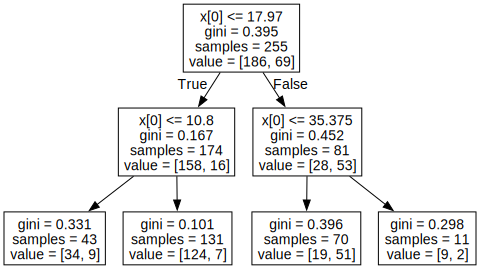

In [113]:
y = pd.get_dummies(ab_reduced_noNaN_copy["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_copy[['List Price']]
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = gv.Source(dot_data, format="png")  
graph.render("iris") 
graph

##### Chat Summary 

https://chatgpt.com/share/673fc63a-6030-8013-82fd-bd72ae341942

Task: You are working with a dataset to train a DecisionTreeClassifier to predict whether a book is hardcover ('H' or not) based solely on the 'List Price' feature, using a max_depth of 2.
Key Steps:
Preparing the data:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] was used to create the target variable (y) indicating whether the book is hardcover or not.
X = ab_reduced_noNaN[['List Price']] selected the 'List Price' feature for the model.
Splitting the data: The data was split into training and test sets using train_test_split.
Model Training: A DecisionTreeClassifier was trained with max_depth=2 to limit the depth of the tree.
Model Evaluation: The accuracy of the model on the test set was calculated.
Plotting the Decision Tree: tree.plot_tree(clf) was mentioned to visualize the decision tree, showing the splitting criteria, leaf nodes, and predicted classes.
Setting a Random Seed: Random seeds were set using random.seed(42), np.random.seed(42), and random_state=42 to ensure reproducibility of the results.

## Post-Lecture HW

### Question 5

0.78125


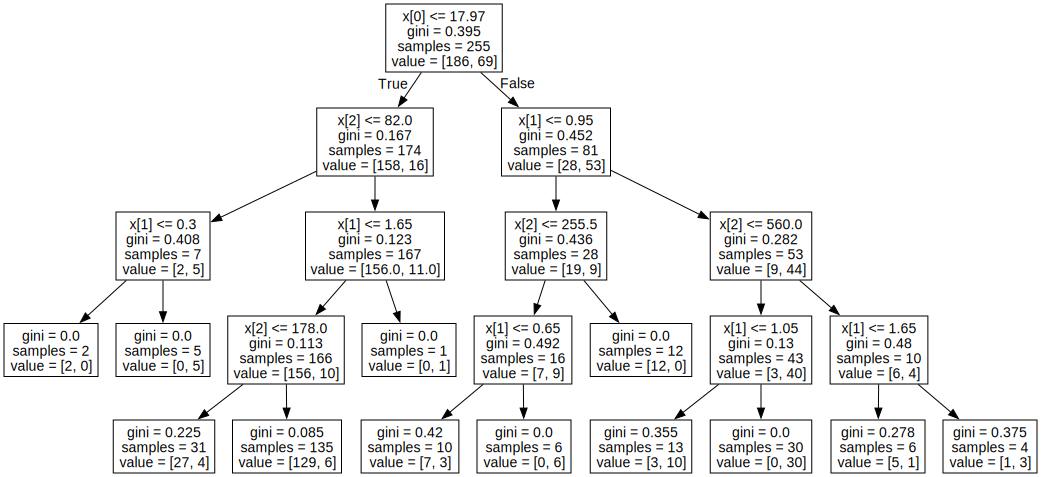

In [155]:
np.random.seed(69)
X2 = ab_reduced_noNaN_copy[['List Price', "Thick", "NumPages"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=1)
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2_train, y2_train)

accuracy = clf2.score(X2_test, y2_test)
print(accuracy)

dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = gv.Source(dot_data, format="png") 
graph.render("iris") 
graph

In [156]:
np.random.seed(420)

clf3 = tree.DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure of split quality
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples at a leaf node
}

grid_search = GridSearchCV(
    estimator=clf3,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,
    verbose=1
)

grid_search.fit(X2_train, y2_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8941176470588236


In [157]:
clf3 = tree.DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
clf3.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

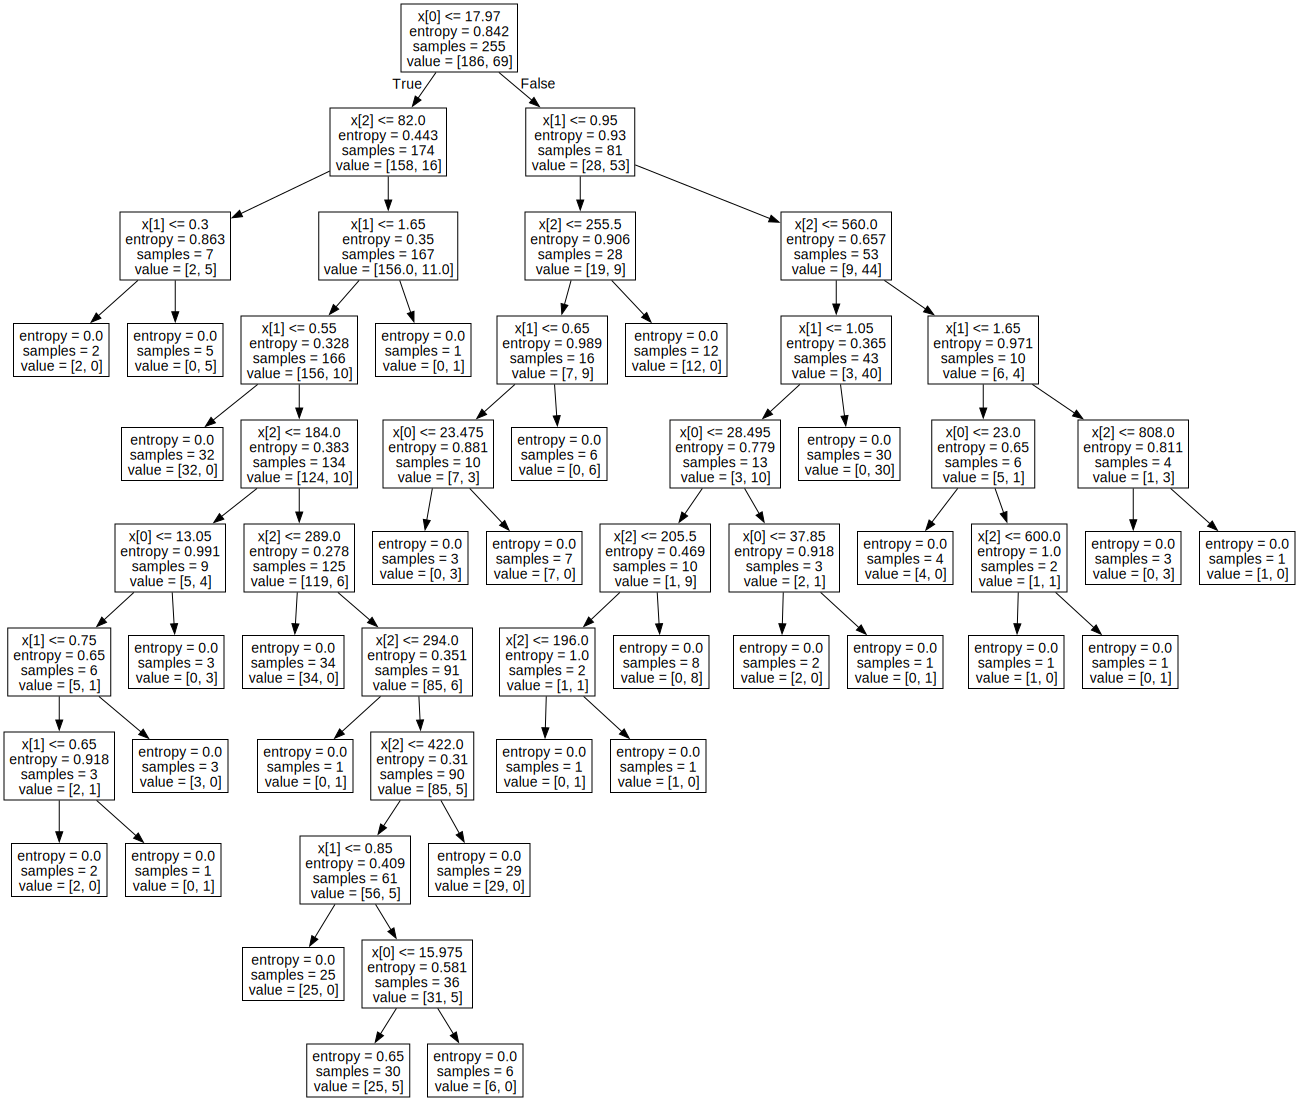

In [158]:
dot_data = tree.export_graphviz(clf3, out_file=None) 
graph = gv.Source(dot_data, format="png") 
graph.render("iris") 
graph

##### Chat Summary 

https://chatgpt.com/share/673ff92f-64e4-8013-bf45-618009b25a24

Decision Trees:
Decision trees are non-parametric models used for classification and regression. They split data based on feature values to minimize a chosen impurity measure (Gini or Entropy).
Gini Impurity:
Definition: Gini Impurity measures the "impurity" of a node, indicating how mixed the classes are. A Gini value of 0 means all samples in the node belong to a single class.
Interpretation: A Gini value close to 0 indicates pure nodes, while higher values indicate more mixed or impure nodes. For example, a node with mostly one class will have a low Gini score.
Entropy:
Definition: Entropy quantifies the disorder or uncertainty in a node. A lower entropy value indicates higher class purity.
Interpretation: A node with all samples from one class will have an entropy of 0 (pure). Higher entropy indicates a more mixed node, where classes are evenly distributed.
P-values in Decision Trees:
Not Typically Used: Decision trees do not use p-values to assess the significance of splits since they are non-parametric models focused on improving prediction accuracy, not on testing hypotheses.
GridSearchCV with Decision Trees:
Hyperparameter Tuning: GridSearchCV can be used to optimize parameters like max_depth, min_samples_split, and criterion (either 'gini' or 'entropy').
Typical Parameters:
max_depth: Controls the maximum depth of the tree.
min_samples_split: Minimum samples required to split a node.
criterion: The splitting criteria, either 'gini' or 'entropy'.


### Question 6

Accuracy of clf:  0.8401
Sensitivity of clf:  0.686
Specificity of clf:  0.897


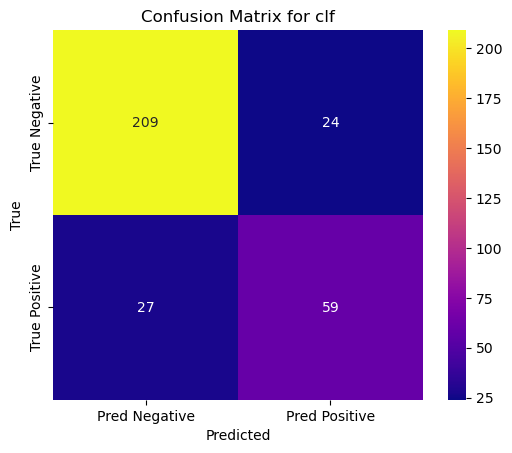

In [164]:
y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for clf")
plt.imshow(cm)

TN, FP, FN, TP = cm.ravel()

accuracy = np.round((TP + TN) / (TP + TN + FP + FN), 4)
sensitivity = np.round(TP / (TP + FN), 4)
specificity = np.round(TN / (TN + FP), 4)

print("Accuracy of clf: ", accuracy)
print("Sensitivity of clf: ", sensitivity)
print("Specificity of clf: ", specificity)

Accuracy of clf2:  0.8997
Sensitivity of clf2:  0.7093
Specificity of clf2:  0.97


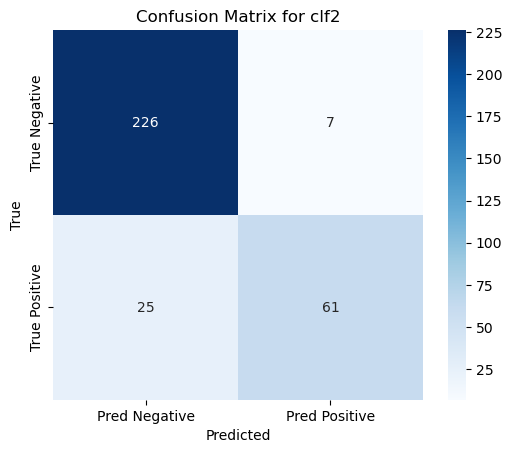

In [168]:
y_pred = clf2.predict(X2)

cm = confusion_matrix(y, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for clf2")
plt.imshow(cm)

TN, FP, FN, TP = cm.ravel()

accuracy = np.round((TP + TN) / (TP + TN + FP + FN), 4)
sensitivity = np.round(TP / (TP + FN), 4)
specificity = np.round(TN / (TN + FP), 4)

print("Accuracy of clf2: ", accuracy)
print("Sensitivity of clf2: ", sensitivity)
print("Specificity of clf2: ", specificity)

Accuracy of clf3:  0.9404
Sensitivity of clf3:  0.8372
Specificity of clf3:  0.9785


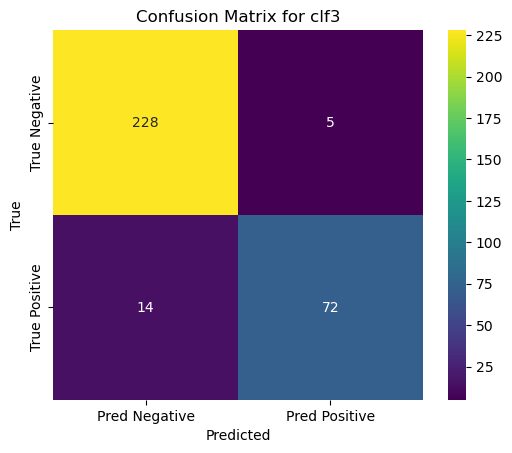

In [171]:
y_pred = clf3.predict(X2)

cm = confusion_matrix(y, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for clf3")
plt.imshow(cm)

TN, FP, FN, TP = cm.ravel()

accuracy = np.round((TP + TN) / (TP + TN + FP + FN), 4)
sensitivity = np.round(TP / (TP + FN), 4)
specificity = np.round(TN / (TN + FP), 4)

print("Accuracy of clf3: ", accuracy)
print("Sensitivity of clf3: ", sensitivity)
print("Specificity of clf3: ", specificity)

##### Chat Summary 

https://chatgpt.com/share/673fff86-3c34-8013-abcb-55e7e8c31182

Confusion Matrix and Model Metrics: We discussed how to use a confusion matrix to evaluate a classification model's performance by calculating accuracy, sensitivity (recall), and specificity. These metrics help assess how well the model identifies positive and negative instances.
Using cm.ravel(): We explored the cm.ravel() function, which flattens the confusion matrix into a 1D array, making it easier to extract values such as True Positives, True Negatives, False Positives, and False Negatives for calculating model performance metrics.
Feature Name Mismatch in Model Prediction: An error occurred when the feature names used during model training didn’t match those used during prediction. This is a common issue when switching between different data formats like pandas DataFrame and NumPy array. The solution is to ensure that the feature names and their order remain consistent between training and prediction. You can either use a DataFrame with the correct column names or convert a NumPy array to a DataFrame before making predictions.


### Question 7

Text(0.5, 1.0, 'Confusion Matrix for clf2')

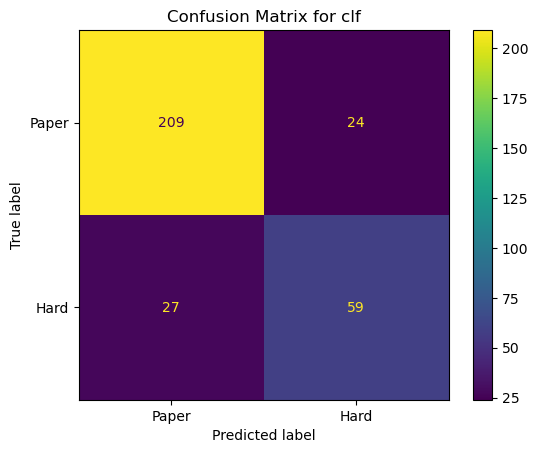

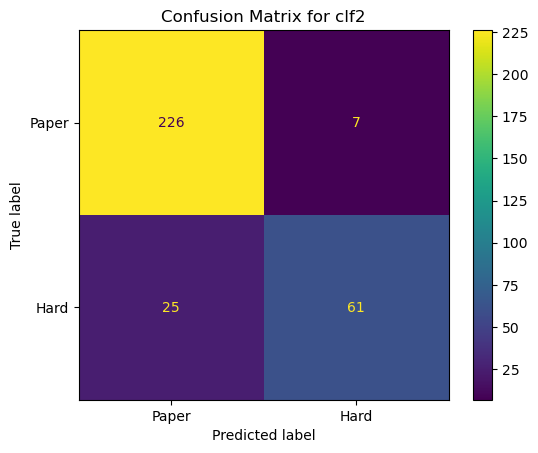

In [190]:
display_clf = ConfusionMatrixDisplay(
    confusion_matrix(y, 
                     clf.predict(X), 
                     labels=[0, 1]), display_labels=["Paper","Hard"])

fig, ax = plt.subplots()
display_clf.plot(ax=ax)
ax.set_title("Confusion Matrix for clf")


display_clf2 = ConfusionMatrixDisplay(
    confusion_matrix(y, 
                     clf2.predict(X2), 
                     labels=[0, 1]), display_labels=["Paper","Hard"])

fig, ax = plt.subplots()
display_clf2.plot(ax=ax)
ax.set_title("Confusion Matrix for clf2")

These were super annoying to work with, I was trying to add titles to both of them so I can see which one is which. What I thought would be a quick conversation with chat turned out to be a long lasting battle for me which took a while to finally get right. And even though I finally got it, it's not as intuitive as the first two graphs.

##### Chat Summary

https://chatgpt.com/share/674003df-02a4-8013-825c-f1cbfa6e52f4

To add a title to a confusion matrix plot, the most reliable method involves manually setting the title using matplotlib after the plot is generated. While some versions of the ConfusionMatrixDisplay class might not support a title parameter directly, using the axis object (ax) allows for explicit control over plot elements like the title. This can be done by creating a figure and axis with matplotlib and applying the title afterward.


### Question 8

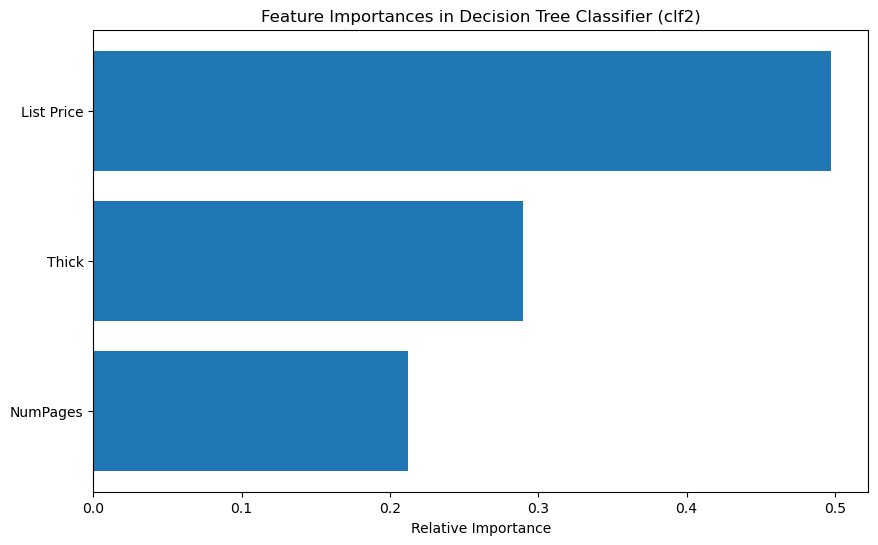

The most important feature is: List Price


In [194]:
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Decision Tree Classifier (clf2)")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Report the most important feature
most_important_feature = feature_names[indices[0]]
print(f"The most important feature is: {most_important_feature}")

##### Chat Summary 

https://chatgpt.com/share/67400bbc-ef88-8013-9331-fb8bc0f56c08

Visualizing Feature Importances: You asked about visualizing feature importances for a decision tree classifier (clf2) in scikit-learn. I provided a Python code snippet to plot a bar chart of feature importances and report the most important feature using .feature_importances_ and .feature_names_in_.
Covariates Meaning: You asked for the meaning of "covariates." I explained that covariates are additional variables included in a statistical model to account for other influences on the outcome, but they are not the primary focus of the analysis.


### Question 9
 
For linear regression models, we are able to use the summary table to look at the p-value of each interactions and predicator variables. For classification decision trees we don't have that available to us since classification trees are much more complex. Also p-value tests aren't viable because classification trees are split based on the criterion (entropy, and gini), which is a completely different concept from linear regression models, which tests p-values by seeing if the coefficients of the model differ significantly from zero. But for classification trees we use feature importance scores to see how well each predicator variable reduce impurity in the tree's splits. 

##### Chat Summary 

https://chatgpt.com/share/67400ece-e684-8013-a681-fd76f7bb0798

In our conversation, we discussed the concept of impurity in decision trees and its importance. Impurity measures how mixed or uncertain the classes are within a node. When building a decision tree, the algorithm splits the data at each node to reduce impurity, aiming to create more homogenous subsets. The more homogeneous the subsets, the more accurate the tree’s predictions will be.
Splitting impurity is important because it guides the tree-building process by choosing the best splits that lead to the largest reduction in impurity. This helps the tree make more accurate predictions and prevents overfitting by simplifying the model. It also ties directly to feature importance, as features that result in larger reductions in impurity are considered more important in the model. Reducing impurity ensures the decision tree is efficient, interpretable, and effective in classifying data.